# WeatherPy
----

### Analysis
1. Wind speed increases after 60 degrees latitude.
2. Latitude has not notcable effect on cloudiness
3. Temperature is the highest at 0 degrees latitude and trends predictably to lower temperature as the latitude increases.

In [1]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key
#api_key = '32b68acac5b84477b26d1b768501a1ee'
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_code = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #for the heck of it we will also collect the country code. God forbid there are 2 cities with similar names!!!
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country_code.append(country)

# Print the city count to confirm sufficient count
len(cities)

610

In [3]:
print(f"We collected {len(cities)} individual cities and their corresponding {len(country_code)} countries")

We collected 610 individual cities and their corresponding 610 countries


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
#lets save more variables than we need to!
lat = []
lon=[]
citylist = []
temp=[]
tempmax= []
tempmin = []
clouds= []
dt=[]
wind = []
humidity=[]
#counters for record processing. Dont want to exceed 60 per minute!
counter = 1
max60requests_counter = 1
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Loop through the list of cities and perform a request for data on each
print("Beginning DATA RETRIVAL")
print("-----------------------")

for city in cities:
    
    try:        
        response = requests.get(query_url + city).json()
        print(f" Processing record number {counter} of set {max60requests_counter} | {(response['name'])}")
        print(f"{(query_url + city)}")
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])           
        citylist.append(response['name'])
        temp.append(response['main']['temp'])
        tempmax.append(response['main']['temp_max'])
        tempmin.append(response['main']['temp_min'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        dt.append(response['dt'])
        clouds.append(response['clouds']['all'])
        if counter < 60:
            counter +=1
        else:
            counter = 0
            max60requests_counter +=1
            time.sleep(60)
            

            
            
    except KeyError:
        print("Record not found. skipping and moving on up!")
print("-----------------------")
print("Retrival Complete")
print("-----------------------")   

Beginning DATA RETRIVAL
-----------------------
 Processing record number 1 of set 1 | Sitka
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=sitka
 Processing record number 2 of set 1 | Zhigansk
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=zhigansk
 Processing record number 3 of set 1 | Magdalena
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=magdalena
 Processing record number 4 of set 1 | Micheweni
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=micheweni
 Processing record number 5 of set 1 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ostrovnoy
 Processing record number 6 of set 1 | Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ushuaia
Record

 Processing record number 52 of set 1 | Vila Franca do Campo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=vila franca do campo
Record not found. skipping and moving on up!
 Processing record number 53 of set 1 | Saskylakh
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=saskylakh
 Processing record number 54 of set 1 | Thompson
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=thompson
 Processing record number 55 of set 1 | Ayan
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ayan
Record not found. skipping and moving on up!
 Processing record number 56 of set 1 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=bathsheba
 Processing record number 57 of set 1 | Georgetown
http://api.openweathermap.org/data/2.5/weath

 Processing record number 40 of set 2 | Henties Bay
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=henties bay
 Processing record number 41 of set 2 | Arifwala
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=arifwala
 Processing record number 42 of set 2 | Puerto del Rosario
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=puerto del rosario
Record not found. skipping and moving on up!
Record not found. skipping and moving on up!
 Processing record number 43 of set 2 | Hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=hithadhoo
 Processing record number 44 of set 2 | Pangobilian
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=pangobilian
 Processing record number 45 of set 2 | Pangkalanbuun
http://api.openweathermap.o

 Processing record number 27 of set 3 | Severo-Kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=severo-kurilsk
 Processing record number 28 of set 3 | Flin Flon
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=flin flon
 Processing record number 29 of set 3 | Richards Bay
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=richards bay
 Processing record number 30 of set 3 | Paraiso
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=paraiso
Record not found. skipping and moving on up!
 Processing record number 31 of set 3 | Byron Bay
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=byron bay
 Processing record number 32 of set 3 | Pierre
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units

 Processing record number 16 of set 4 | Knysna
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=knysna
 Processing record number 17 of set 4 | Srandakan
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=srandakan
 Processing record number 18 of set 4 | San Patricio
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=san patricio
Record not found. skipping and moving on up!
Record not found. skipping and moving on up!
 Processing record number 19 of set 4 | Gonbad-e Qabus
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=gonbad-e qabus
 Processing record number 20 of set 4 | Ambagarh Chauki
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ambagarh chauki
 Processing record number 21 of set 4 | Arcachon
http://api.openweathermap.org/data

 Processing record number 4 of set 5 | Lockport
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=lockport
 Processing record number 5 of set 5 | Northam
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=northam
 Processing record number 6 of set 5 | Passy
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=passy
 Processing record number 7 of set 5 | Wanaka
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=wanaka
 Processing record number 8 of set 5 | Snyder
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=snyder
 Processing record number 9 of set 5 | Prince George
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=prince george
 Processing record number 10 of set 5 | Anadyr
http://api.

 Processing record number 56 of set 5 | Damietta
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=damietta
 Processing record number 57 of set 5 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=nouadhibou
 Processing record number 58 of set 5 | Buchanan
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=buchanan
 Processing record number 59 of set 5 | Krasnokamsk
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=krasnokamsk
 Processing record number 60 of set 5 | Dunmore Town
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=dunmore town
 Processing record number 0 of set 6 | Padang
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=padang
 Processing record number 1 of se

 Processing record number 45 of set 6 | Taksimo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=taksimo
 Processing record number 46 of set 6 | Red Bluff
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=red bluff
 Processing record number 47 of set 6 | Lucea
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=lucea
 Processing record number 48 of set 6 | The Valley
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=the valley
 Processing record number 49 of set 6 | Narsaq
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=narsaq
 Processing record number 50 of set 6 | Ambilobe
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ambilobe
 Processing record number 51 of set 6 | Khatanga
htt

 Processing record number 36 of set 7 | Djibo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=djibo
 Processing record number 37 of set 7 | Penalva
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=penalva
 Processing record number 38 of set 7 | Antalaha
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=antalaha
 Processing record number 39 of set 7 | Quesnel
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=quesnel
 Processing record number 40 of set 7 | La Roda
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=la roda
 Processing record number 41 of set 7 | Yaan
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=yaan
 Processing record number 42 of set 7 | Saint-Paul
http://api.open

 Processing record number 26 of set 8 | Mahina
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=mahina
 Processing record number 27 of set 8 | Ratzeburg
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=ratzeburg
 Processing record number 28 of set 8 | Mayo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=mayo
Record not found. skipping and moving on up!
 Processing record number 29 of set 8 | Port Hardy
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=port hardy
 Processing record number 30 of set 8 | Sao Francisco
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=sao francisco
 Processing record number 31 of set 8 | Parana
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=parana
 

 Processing record number 17 of set 9 | San Angelo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=san angelo
 Processing record number 18 of set 9 | Gurupi
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=gurupi
 Processing record number 19 of set 9 | Quatre Cocos
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=quatre cocos
Record not found. skipping and moving on up!
 Processing record number 20 of set 9 | Zhavoronki
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=zhavoronki
 Processing record number 21 of set 9 | Milkovo
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q=milkovo
 Processing record number 22 of set 9 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?appid=32b68acac5b84477b26d1b768501a1ee&units=metric&q

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
cities_list = pd.DataFrame(citylist, columns=['City'])
temp_list = pd.DataFrame(temp, columns=['Temperature'])
humidity_list = pd.DataFrame(humidity, columns=['Humidity'])
clouds_list = pd.DataFrame(clouds, columns=['Clouds'])
wind_speed_list = pd.DataFrame(wind, columns=['Wind'])
lat_list = pd.DataFrame(lat, columns=['Latitude'])
lng_list = pd.DataFrame(lon, columns=['Longitude'])
#combine all into one dataframe and Write to CSV
weather_combined = pd.concat([cities_list, temp_list,humidity_list,clouds_list,wind_speed_list, lng_list, lat_list], axis=1, join_axes=[cities_list.index])
#write to CSV
weather_combined.to_csv('Weather Full Data Frame.csv')
#display first 10 records
weather_combined.head(10)

,City,Temperature,Humidity,Clouds,Wind,Longitude,Latitude
0,Sitka,7.22,87,0,1.34,-99.65,37.17
1,Zhigansk,-23.17,68,0,1.22,123.37,66.77
2,Magdalena,30.00,74,75,3.10,-64.05,-13.26
3,Micheweni,28.73,100,0,5.47,39.83,-4.97
4,Ostrovnoy,-1.87,96,88,9.27,39.51,68.05
5,Ushuaia,7.00,75,75,7.70,-68.31,-54.81
6,Upernavik,-14.57,100,76,10.37,-56.15,72.79
7,Carrefour,27.44,69,75,3.60,-72.41,18.53
8,Hilo,17.91,72,90,2.10,-155.08,19.71
9,Airai,21.23,91,8,0.77,125.41,-8.93


In [6]:
#describe the dataframe
weather_combined.count()

City           542
Temperature    542
Humidity       542
Clouds         542
Wind           542
Longitude      542
Latitude       542
dtype: int64

#### Latitude vs. Temperature Plot

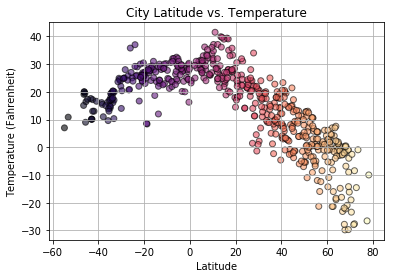

In [7]:
# Build a scatter plot for each data type
#Props to Drew for showing the cmap function!
plt.scatter(weather_combined["Latitude"], weather_combined["Temperature"], marker="o", c = weather_combined["Latitude"], alpha=0.6, cmap='magma', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.ylabel("Temperature (Fahrenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Temp.png")

# Show plot
plt.show()

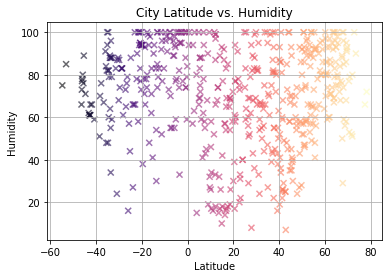

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_combined["Latitude"], weather_combined["Humidity"], marker="x", c = weather_combined["Latitude"], alpha=0.6, cmap='magma', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

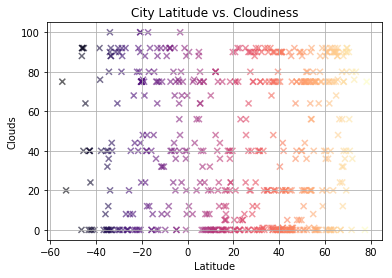

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_combined["Latitude"], weather_combined["Clouds"], marker="x", c = weather_combined["Latitude"], alpha=0.6, cmap='magma', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Clouds")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

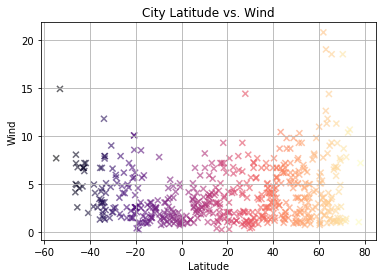

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_combined["Latitude"], weather_combined["Wind"], marker="x", c = weather_combined["Latitude"], alpha=0.6, cmap='magma', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind")
plt.ylabel("Wind")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()